In [128]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.style
import matplotlib as mpl

mpl.style.use('classic')

import baraffe_tables
from baraffe_tables.table_search import baraffe_table_search

from astropy.table import Table
from astropy import units as u
from astropy.constants import G

from scipy.optimize import fsolve

import mesa_helper as mh
import os
import shutil

%matplotlib inline

In [2]:
mJtomSun = u.jupiterMass.to(u.solMass)
mJtoGrams = u.jupiterMass.to(u.g)

rJtorSun = u.jupiterRad.to(u.solRad)
rJtoCm = u.jupiterRad.to(u.cm)

print(mJtomSun)
print(mJtoGrams)
print(rJtorSun)
print(rJtoCm)


0.0009545942339693249
1.8981245973360504e+30
0.10276268506540176
7149200000.0


In [122]:
pp_extras_species = ['h1', 'h2', 'he3', 'he4', 'li7', 'be7', 'b8', 'c12', 'n14', 'o16', 'ne20', 'mg24']
pp_extras_amu = np.array((1.007825032, 2.014101778, 3.01602932, 4.002603254, 7.016003428, 7.01692871, 8.0246073, 12., 14.003074, 15.99491462, 19.99244018, 23.9850417))

# mass fractions for h1, h2, he3, he4, li7, c12, n14, o16, ne20 come from Lodders 2021
# mass fractions for be7, b8 come from MESA gs98 chem lib (Grevesse & Sauval 1998) (but note, these are so so trace)
# mass fraction for mg24 is 1 - sum of all the others
pp_extras_protosolar_mass_fractions = np.array((7.057e-1, 2.781e-5, 3.461e-5, 2.769e-1, 1.025e-8, 3.592e-89, 1.e-99, 3.011e-3, 8.482e-4, 7.377e-3, 2.261e-3, 5.398e-4))
pp_extras_protosolar_mass_fractions[-1] = 1.0 - np.sum(pp_extras_protosolar_mass_fractions[:-1])

pp_extras_XY = pp_extras_protosolar_mass_fractions[0]/pp_extras_protosolar_mass_fractions[3]
print(pp_extras_XY)
pp_extras_X = np.sum(pp_extras_protosolar_mass_fractions[0:2])
print(pp_extras_X)
pp_extras_Y = np.sum(pp_extras_protosolar_mass_fractions[2:4])
print(pp_extras_Y)
pp_extras_Z = np.sum(pp_extras_protosolar_mass_fractions[4:])
print(pp_extras_Z)

2.548573492235464
0.70572781
0.27693460999999997
0.01733758000000024


In [123]:
tp = Table.read("../reproducePaxton+2011fig18_24.08.1/make_brown_dwarf/LOGS_pp_extras/profile3.data", format="ascii", header_start=4, data_start=5)
print(tp)
print(tp.colnames)

zone          mass          ... brunt_N2_sub_omega2 sl2_sub_omega2
---- ---------------------- ... ------------------- --------------
   1   0.010004446413508129 ...                 1.0            0.0
   2   0.010004446413498125 ...                 1.0            0.0
   3    0.01000444641348562 ...                 1.0            0.0
   4   0.010004446413473114 ...                 1.0            0.0
   5   0.010004446413448102 ...                 1.0            0.0
   6    0.01000444641339808 ...                 1.0            0.0
   7   0.010004446413273025 ...                 1.0            0.0
   8    0.01000444641314797 ...                 1.0            0.0
   9   0.010004446412897858 ...                 1.0            0.0
  10   0.010004446412397635 ...                 1.0            0.0
 ...                    ... ...                 ...            ...
 547    5.8545164584831e-07 ...                 0.0            1.0
 548  3.950056478270642e-07 ...                 0.0           

In [136]:
print(tp['dm'])

          dm          
----------------------
1.9892939999489274e+19
2.4866174999361597e+19
2.4866174999361593e+19
 4.973234999872318e+19
 9.946469999744637e+19
 2.486617499936159e+20
 2.486617499936159e+20
 4.973234999872318e+20
 9.946469999744635e+20
1.6251746421914185e+21
                   ...
 3.786847023003866e+26
 3.501431690798018e+26
2.3713458246697187e+26
1.0794967402094649e+26
 4.914156852271253e+25
2.2370589348720503e+25
1.0183715791312003e+25
4.6359140053819124e+24
1.9281038453137143e+24
 1.945812052902957e+24
Length = 556 rows


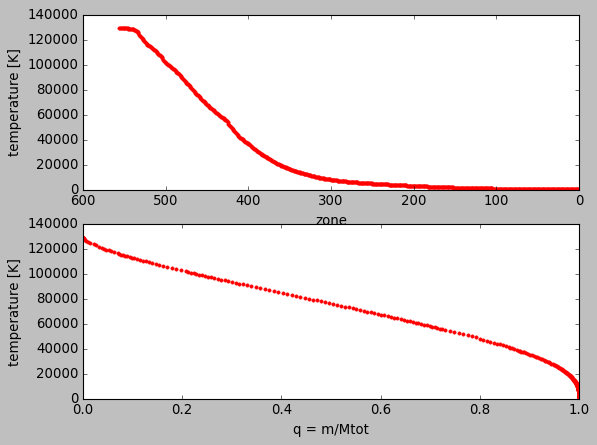

In [67]:
fig, axes = plt.subplots(2,1,figsize=(8,6))
#axes[0].plot(tp['zone'],tp['z_mass_fraction_metals'], 'k.')
axes[0].plot(tp['zone'],tp['temperature'], 'r.')
axes[0].set_xlabel('zone')
axes[0].set_ylabel('temperature [K]')
axes[0].invert_xaxis()
#axes[0].set_ylim(0,1)

#axes[1].plot(tp['q'],tp['z_mass_fraction_metals'], 'k.')
axes[1].plot(tp['q'],tp['temperature'], 'r.')
axes[1].set_xlabel('q = m/Mtot')
axes[1].set_ylabel('temperature [K]')
plt.show()

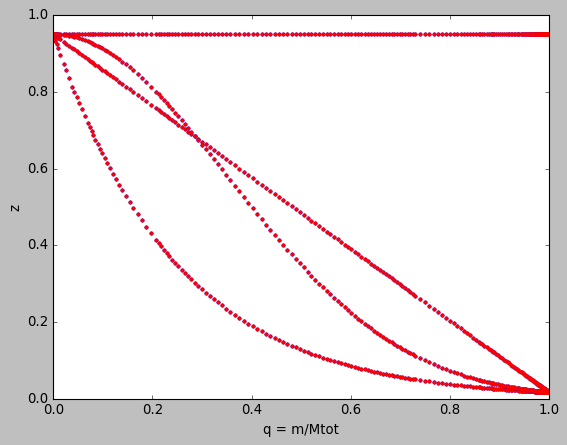

In [120]:
# q starts at 1 and goes to 0 
#xq starts at 0 and goes to 1

#z(xq) should start low and go high

uniform_z = zmax*np.ones_like(tp['q'])
linear_z = zmax-(zmax-pp_extras_Z)*np.array(tp['q'])
exp_z = zmax * (zmax/pp_extras_Z)**(-np.array(tp['q']))
gaussian_z = zmax * (zmax/pp_extras_Z)**(-np.array(tp['q'])**2)

fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(tp['q'], uniform_z, 'b.')
ax.plot(1-tp['xq'], uniform_z, 'r.')

ax.plot(tp['q'], linear_z, 'b.')
ax.plot(1-tp['xq'], linear_z, 'r.')

ax.plot(tp['q'], exp_z, 'b.')
ax.plot(1-tp['xq'], exp_z, 'r.')

ax.plot(tp['q'], gaussian_z, 'b.')
ax.plot(1-tp['xq'], gaussian_z, 'r.')

ax.set_xlabel("q = m/Mtot")
ax.set_ylabel("z")
plt.show()

In [155]:
def total_metal_mass(zone_z, zone_dm):
    zone_zmass = (zone_z*zone_dm)
    return np.sum(zone_zmass)

z = total_metal_mass(tp['z_mass_fraction_metals'], tp['dm']*u.g)
print(z.to(u.earthMass))

57.7504595167869 earthMass


In [150]:

exp_z = zmax * (zmax/pp_extras_Z)**(-np.array(tp['q']))
gaussian_z = zmax * (zmax/pp_extras_Z)**(-np.array(tp['q'])**2)

def generate_uniform_profile(q, dm, protosolar_Z=0.01733758, desired_total_metals=60*u.earthMass, species=pp_extras_species, protosolar_mass_fractions=pp_extras_protosolar_mass_fractions):
    m_planet = np.sum(np.array(dm)) * u.g
    zs = (desired_total_metals.to(u.g)/m_planet) * np.ones_like(np.array(q))
    return zs         

def generate_linear_profile(q, dm, protosolar_Z=0.01733758, desired_total_metals=60*u.earthMass, species=pp_extras_species, protosolar_mass_fractions=pp_extras_protosolar_mass_fractions):
    m_planet = np.sum(np.array(dm)) * u.g
    """
    Fix this normalization tomorrow
    """
    Z_max = 2*(desired_total_metals.to(u.g)/m_planet) + protosolar_Z
    zs = Z_max - (Z_max - protosolar_Z)*q
    return zs

test = generate_linear_profile(tp['q'],tp['dm'], desired_total_metals=60*u.earthMass)
test_total_metals = np.sum(test * tp['dm']*u.g)
print(test_total_metals.to(u.earthMass))

'''
def exponential_total_metals(Z_max, desired_total_metals=60*u.earthMass, protosolar_Z=0.01733758):
    return desired_total_metals.value - (protosolar_Z - Z_max)/np.log(protosolar_Z/Z_max)

Z_max = fsolve(exponential_total_metals, x0=0.75)
print(Z_max)
'''
'''
def generate_exponential_profile(q, protosolar_Z=0.01733758, desired_total_metals=60*u.earthMass, species=pp_extras_species, protosolar_mass_fractions=pp_extras_protosolar_mass_fractions):

    Z_max = fsolve(exponential_total_metals)
    prin
    
    return zs
'''

87.55618501347332 earthMass


'\ndef generate_exponential_profile(q, protosolar_Z=0.01733758, desired_total_metals=60*u.earthMass, species=pp_extras_species, protosolar_mass_fractions=pp_extras_protosolar_mass_fractions):\n\n    Z_max = fsolve(exponential_total_metals)\n    prin\n    \n    return zs\n'

In [142]:
def format_profile(profile_array, savefilename):
    return

In [127]:
test = 10*u.earthMass
print(test.value)

10.0
